In [1]:
function get_dimensions( n :: Int32 )
    subpath_dimensions = [3, 2, 2]
    
    for i = 1:n
        subpath_dimensions = [2 0 1; 1 1 0; 1 0 2] * subpath_dimensions + [-2, -1, -2]
    end
    return subpath_dimensions
end

get_dimensions (generic function with 1 method)

In [9]:
get_dimensions(1)

3-element Array{Int32,1}:
 6
 4
 5

In [405]:
function get_correspondence( n :: Int32 )
    correspondence = [ 1, 4, 2, 0, 3, 5 ];
    inverse_correspondence = [1, 3, 5, 2, 6];
    subpath_dimensions = [3,2,2];
    
    for i = 2:n
        new_correspondence = Array(Int32, div(3^(i+1) + 3, 2) )
        new_inverse_correspondence = Array(Int32, div(3^(i+1) + 3, 2) - 1 )
        subpath_dimensions = [2 0 1; 1 1 0; 1 0 2] * subpath_dimensions + [-2, -1, -2]
         
    
        new_correspondence[1:(subpath_dimensions[2]-1)] = correspondence[1:(subpath_dimensions[2]-1)]
        new_correspondence[subpath_dimensions[2]] = 2*(subpath_dimensions[3] - 1) + subpath_dimensions[2]
        new_correspondence[(subpath_dimensions[2]+1):subpath_dimensions[1]] = correspondence[(subpath_dimensions[2]+1):end]
        new_correspondence[subpath_dimensions[1]+1:subpath_dimensions[1]+subpath_dimensions[2]-2] = subpath_dimensions[3] - 1 + correspondence[2:subpath_dimensions[2]-1]
        new_correspondence[subpath_dimensions[1] - 1 + subpath_dimensions[2]] = 0
        new_correspondence[subpath_dimensions[1]+subpath_dimensions[2]:2*subpath_dimensions[1] - 1] = subpath_dimensions[3] - 1 + correspondence[subpath_dimensions[2]+1:subpath_dimensions[1]]
        new_correspondence[2*subpath_dimensions[1]:end] = 2*(subpath_dimensions[3]-1) + inverse_correspondence[2:end]
        
        correspondence = new_correspondence
        inverse_correspondence = sortperm(new_correspondence)[2:end]
    end
    return correspondence, inverse_correspondence
end        

get_correspondence (generic function with 1 method)

In [406]:
@time get_correspondence(11)

elapsed time: 0.875700785 seconds (9605924 bytes allocated, 2.57% gc time)


([1,4,2,12,3,5,8,6,35,7  …  265712,265714,265716,265713,265717,265720,265718,265710,265719,265721],[1,3,5,2,6,8,10,7,11,14  …  265713,265716,265714,265689,265715,265717,265719,265721,265718,265722])

In [139]:
m = 2
total_length = div(3^(m+1) + 3, 2)

harmonic_values_matrix = Array(Float64, (total_length, 3) )

subpath_dimensions = Array(Int32, (m,3))
subpath_dimensions[1,:] = [3, 2, 2]

for i = 2:m
    subpath_dimensions[i,:] = [2 0 1; 1 1 0; 1 0 2] * subpath_dimensions[i-1,:]' + [-2, -1, -2]
end

extender_0 = [1 0 0; 2.0/5.0 2.0/5.0 1.0/5.0; 2.0/5.0 1.0/5.0 2.0/5.0];
extender_1 = [2.0/5.0 2.0/5.0 1.0/5.0; 0 1 0; 1.0/5.0 2.0/5.0 2.0/5.0];
extender_2 = [2.0/5.0 1.0/5.0 2.0/5.0; 1.0/5.0 2.0/5.0 2.0/5.0; 0 0 1];

A0 = eye(Float64,3)
harmonic_values_matrix[[1,subpath_dimensions[end,1] - 1 + subpath_dimensions[end,2], total_length], :] = A0

A = [ 1.0/5.0 2.0/5.0 2.0/5.0; 2.0/5.0 1.0/5.0 2.0/5.0; 2.0/5.0 2.0/5.0 1.0/5.0];


harmonic_values_matrix[[2*subpath_dimensions[m,1] - 1, subpath_dimensions[m,2], subpath_dimensions[m,1]],:] = A

A = [ A * extender_0; A * extender_1; A * extender_2]
indexer = [ 2*subpath_dimensions[m-1,1] - 1, 
    subpath_dimensions[m-1,1], 
    subpath_dimensions[m-1,2], 
    subpath_dimensions[m,1] + 2*subpath_dimensions[m-1,1] - 2, 
    subpath_dimensions[m,1] + subpath_dimensions[m-1,2] - 1, 
    subpath_dimensions[m,1] + subpath_dimensions[m-1,1] - 1,
    2*(subpath_dimensions[m,1] + subpath_dimensions[m-1,3] - 2) + subpath_dimensions[m-1,2],
    2*(subpath_dimensions[m,1] + subpath_dimensions[m-1,3] - 1) - 1,
    2*(subpath_dimensions[m,1] - 1) + subpath_dimensions[m-1,3]]

@printf("%s\n", A)
@printf("%s\n", indexer)
harmonic_values_matrix[indexer,:] = A

harmonic_values_matrix

[0.52 0.24000000000000005 0.24000000000000005
 0.6400000000000001 0.16000000000000003 0.20000000000000004
 0.6400000000000001 0.20000000000000004 0.16000000000000003
 0.16000000000000003 0.6400000000000001 0.20000000000000004
 0.24000000000000005 0.52 0.24000000000000005
 0.20000000000000004 0.6400000000000001 0.16000000000000003
 0.16000000000000003 0.20000000000000004 0.6400000000000001
 0.20000000000000004 0.16000000000000003 0.6400000000000001
 0.24000000000000005 0.24000000000000005 0.52]
[5,3,2,10,7,8,14,13,12]


15x3 Array{Float64,2}:
 1.0   0.0   0.0 
 0.64  0.2   0.16
 0.64  0.16  0.2 
 0.4   0.2   0.4 
 0.52  0.24  0.24
 0.4   0.4   0.2 
 0.24  0.52  0.24
 0.2   0.64  0.16
 0.0   1.0   0.0 
 0.16  0.64  0.2 
 0.2   0.4   0.4 
 0.24  0.24  0.52
 0.2   0.16  0.64
 0.16  0.2   0.64
 0.0   0.0   1.0 

In [227]:
m = 2
total_length = div(3^(m+1) + 3, 2)

harmonic_values_matrix2 = Array(Float64, (total_length, 3) )

subpath_dimensions = Array(Int32, (m,3))
subpath_dimensions[1,:] = [3, 2, 2]

for i = 2:m
    subpath_dimensions[i,:] = [2 0 1; 1 1 0; 1 0 2] * subpath_dimensions[i-1,:]' + [-2, -1, -2]
end

extender_0 = [1 0 0; 2.0/5.0 2.0/5.0 1.0/5.0; 2.0/5.0 1.0/5.0 2.0/5.0];
extender_1 = [2.0/5.0 2.0/5.0 1.0/5.0; 0 1 0; 1.0/5.0 2.0/5.0 2.0/5.0];
extender_2 = [2.0/5.0 1.0/5.0 2.0/5.0; 1.0/5.0 2.0/5.0 2.0/5.0; 0 0 1];

A0 = eye(Float64,3)
harmonic_values_matrix2[[1,subpath_dimensions[m,1] - 1 + subpath_dimensions[m,2], total_length], :] = A0

A = [ 1.0/5.0 2.0/5.0 2.0/5.0; 2.0/5.0 1.0/5.0 2.0/5.0; 2.0/5.0 2.0/5.0 1.0/5.0];


harmonic_values_matrix2[[2*subpath_dimensions[m,1] - 1, subpath_dimensions[m,2], subpath_dimensions[m,1]],:] = A

top_indexer = [2*subpath_dimensions[m-1,1] - 1, subpath_dimensions[m-1,2], subpath_dimensions[m-1,1]]
top_indexer_dual = [ 2*subpath_dimensions[m-1,3]-1, 2*(subpath_dimensions[m-1,3] - 1) + subpath_dimensions[m-1,2], subpath_dimensions[m-1,3]]
indexer = [top_indexer, subpath_dimensions[m,1]-1+top_indexer, 2*(subpath_dimensions[m,1]-1) + top_indexer_dual]
A = [A * extender_0*[1 0 0; 0 0 1; 0 1 0]; A * extender_1; A * extender_2 * [0 1 0; 1 0 0; 0 0 1] ]

@printf("%s\n", top_indexer_dual)
@printf("%s\n", A)
@printf("%s\n", indexer)

harmonic_values_matrix2[indexer,:] = A
harmonic_values_matrix2

[3,4,2]
[0.52 0.24000000000000005 0.24000000000000005
 0.6400000000000001 0.20000000000000004 0.16000000000000003
 0.6400000000000001 0.16000000000000003 0.20000000000000004
 0.16000000000000003 0.6400000000000001 0.20000000000000004
 0.24000000000000005 0.52 0.24000000000000005
 0.20000000000000004 0.6400000000000001 0.16000000000000003
 0.20000000000000004 0.16000000000000003 0.6400000000000001
 0.16000000000000003 0.20000000000000004 0.6400000000000001
 0.24000000000000005 0.24000000000000005 0.52]
[5,2,3,10,7,8,13,14,12]


15x3 Array{Float64,2}:
 1.0   0.0   0.0 
 0.64  0.2   0.16
 0.64  0.16  0.2 
 0.4   0.2   0.4 
 0.52  0.24  0.24
 0.4   0.4   0.2 
 0.24  0.52  0.24
 0.2   0.64  0.16
 0.0   1.0   0.0 
 0.16  0.64  0.2 
 0.2   0.4   0.4 
 0.24  0.24  0.52
 0.2   0.16  0.64
 0.16  0.2   0.64
 0.0   0.0   1.0 

In [224]:
harmonic_values_matrix - harmonic_values_matrix2

15x3 Array{Float64,2}:
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0

## M

In [764]:
m = 3
total_length = div(3^(m+1) + 3, 2)

42

In [765]:
harmonic_values_matrix3 = Array(Float64, (total_length, 3) );

In [766]:
subpath_dimensions = Array(Int32, (m,3))
indices = Array(Int32, (m, 3))
dual_indices = Array(Int32, (m,3))
vertex_offsets = Array(Int32, (m, 3))
dual_vertex_offsets = Array(Int32, (m, 3))

subpath_dimensions[1,:] = [3, 2, 2]
indices[1,:] = [2*subpath_dimensions[1,1]-1, subpath_dimensions[1,2], subpath_dimensions[1,1] ]
dual_indices[1,:] = [ 2*subpath_dimensions[1,3] - 1, 2*subpath_dimensions[1,3] - 2 + subpath_dimensions[1,2], subpath_dimensions[1,3]]
vertex_offsets[1,:] = [0, subpath_dimensions[1,1]-1, 2*subpath_dimensions[1,1]-2]
dual_vertex_offsets[1,:] = [0, subpath_dimensions[1,3]-1, 2*subpath_dimensions[1,3]-2]
for i = 2:m
    subpath_dimensions[i,:] = [2 0 1; 1 1 0; 1 0 2] * subpath_dimensions[i-1,:]' + [-2, -1, -2]
    indices[i,:] = [2*subpath_dimensions[i,1]-1, subpath_dimensions[i,2], subpath_dimensions[i,1] ]
    vertex_offsets[i,:] = [0, subpath_dimensions[i,1]-1, 2*subpath_dimensions[i,1]-2]
    dual_indices[i,:] = [ 2*subpath_dimensions[i,3] - 1, 2*subpath_dimensions[i,3] - 2 + subpath_dimensions[i,2], subpath_dimensions[i,3]]
    dual_vertex_offsets[i,:] = [0, subpath_dimensions[i,3]-1, 2*subpath_dimensions[i,3]-2]
end
subpath_dimensions

3x3 Array{Int32,2}:
  3  2   2
  6  4   5
 15  9  14

In [767]:
indices

3x3 Array{Int32,2}:
  5  2   3
 11  4   6
 29  9  15

In [768]:
dual_indices

3x3 Array{Int32,2}:
  3   4   2
  9  12   5
 27  35  14

In [769]:
vertex_offsets

3x3 Array{Int32,2}:
 0   2   4
 0   5  10
 0  14  28

In [770]:
extender_0 = [1 0 0; 2.0/5.0 2.0/5.0 1.0/5.0; 2.0/5.0 1.0/5.0 2.0/5.0];
extender_1 = [2.0/5.0 2.0/5.0 1.0/5.0; 0 1 0; 1.0/5.0 2.0/5.0 2.0/5.0];
extender_2 = [2.0/5.0 1.0/5.0 2.0/5.0; 1.0/5.0 2.0/5.0 2.0/5.0; 0 0 1];

In [771]:
A0 = eye(Float64,3)
harmonic_values_matrix3[[1,subpath_dimensions[m,1] - 1 + subpath_dimensions[m,2], total_length], :] = A0
harmonic_values_matrix3

42x3 Array{Float64,2}:
 1.0           0.0           0.0         
 7.97307e-240  5.40478e-241  2.32835e-238
 2.45038e-247  9.93315e-239  1.35131e-246
 1.78089e-267  1.78089e-267  1.78089e-267
 6.61544e-240  5.05786e-241  5.30747e-247
 2.14473e-255  7.47786e-239  1.22066e-246
 1.78089e-267  1.78089e-267  1.78089e-267
 2.15818e-240  4.50133e-241  3.93905e-247
 6.66768e-249  6.34354e-243  1.09727e-246
 1.78089e-267  1.78089e-267  1.78089e-267
 1.91473e-240  7.47899e-243  3.07021e-247
 3.53332e-249  1.44268e-243  1.19201e-239
 1.78089e-267  1.78089e-267  1.78089e-267
 ⋮                                       
 1.78089e-267  1.78089e-267  1.78089e-267
 5.76803e-239  1.79137e-237  1.5061e-246 
 5.46738e-244  2.37537e-229  9.9161e-222 
 1.78089e-267  1.78089e-267  1.78089e-267
 7.23245e-240  1.26543e-237  1.24917e-246
 5.01718e-244  1.93137e-237  9.64527e-222
 1.78089e-267  1.78089e-267  1.78089e-267
 6.94042e-240  2.9167e-238   7.11316e-238
 3.95957e-244  1.39513e-237  1.19259e-213
 1.78089e-2

In [772]:
A1 = [ 1.0/5.0 2.0/5.0 2.0/5.0; 2.0/5.0 1.0/5.0 2.0/5.0; 2.0/5.0 2.0/5.0 1.0/5.0];

In [773]:
if m >= 1
    harmonic_values_matrix3[indices[m,:], :] = A1
end
harmonic_values_matrix3

42x3 Array{Float64,2}:
 1.0           0.0           0.0         
 7.97307e-240  5.40478e-241  2.32835e-238
 2.45038e-247  9.93315e-239  1.35131e-246
 1.78089e-267  1.78089e-267  1.78089e-267
 6.61544e-240  5.05786e-241  5.30747e-247
 2.14473e-255  7.47786e-239  1.22066e-246
 1.78089e-267  1.78089e-267  1.78089e-267
 2.15818e-240  4.50133e-241  3.93905e-247
 0.4           0.2           0.4         
 1.78089e-267  1.78089e-267  1.78089e-267
 1.91473e-240  7.47899e-243  3.07021e-247
 3.53332e-249  1.44268e-243  1.19201e-239
 1.78089e-267  1.78089e-267  1.78089e-267
 ⋮                                       
 1.78089e-267  1.78089e-267  1.78089e-267
 5.76803e-239  1.79137e-237  1.5061e-246 
 5.46738e-244  2.37537e-229  9.9161e-222 
 1.78089e-267  1.78089e-267  1.78089e-267
 7.23245e-240  1.26543e-237  1.24917e-246
 5.01718e-244  1.93137e-237  9.64527e-222
 1.78089e-267  1.78089e-267  1.78089e-267
 6.94042e-240  2.9167e-238   7.11316e-238
 3.95957e-244  1.39513e-237  1.19259e-213
 1.78089e-2

In [774]:
indexer = [vertex_offsets[m,1] + indices[m-1,:][:], 
    vertex_offsets[m,2] + indices[m-1,:][:], 
    vertex_offsets[m,3] + dual_indices[m-1,:][:]]
A2 = [A1 * extender_0*[1 0 0; 0 0 1; 0 1 0]; A1 * extender_1; A1 * extender_2 * [0 1 0; 1 0 0; 0 0 1] ]

9x3 Array{Float64,2}:
 0.52  0.24  0.24
 0.64  0.2   0.16
 0.64  0.16  0.2 
 0.16  0.64  0.2 
 0.24  0.52  0.24
 0.2   0.64  0.16
 0.2   0.16  0.64
 0.16  0.2   0.64
 0.24  0.24  0.52

In [775]:
indexer

9-element Array{Int32,1}:
 11
  4
  6
 25
 18
 20
 37
 40
 33

In [776]:
if m >= 2
    harmonic_values_matrix3[indexer,:] = A2
end
harmonic_values_matrix3

42x3 Array{Float64,2}:
 1.0           0.0           0.0         
 7.97307e-240  5.40478e-241  2.32835e-238
 2.45038e-247  9.93315e-239  1.35131e-246
 0.64          0.2           0.16        
 6.61544e-240  5.05786e-241  5.30747e-247
 0.64          0.16          0.2         
 1.78089e-267  1.78089e-267  1.78089e-267
 2.15818e-240  4.50133e-241  3.93905e-247
 0.4           0.2           0.4         
 1.78089e-267  1.78089e-267  1.78089e-267
 0.52          0.24          0.24        
 3.53332e-249  1.44268e-243  1.19201e-239
 1.78089e-267  1.78089e-267  1.78089e-267
 ⋮                                       
 1.78089e-267  1.78089e-267  1.78089e-267
 5.76803e-239  1.79137e-237  1.5061e-246 
 0.24          0.24          0.52        
 1.78089e-267  1.78089e-267  1.78089e-267
 7.23245e-240  1.26543e-237  1.24917e-246
 5.01718e-244  1.93137e-237  9.64527e-222
 0.2           0.16          0.64        
 6.94042e-240  2.9167e-238   7.11316e-238
 3.95957e-244  1.39513e-237  1.19259e-213
 0.16      

In [777]:
indexer = [vertex_offsets[m,1] + vertex_offsets[m-1,1] + indices[m-2,:][:], 
    vertex_offsets[m,1] + vertex_offsets[m-1,2] + indices[m-2,:][:], 
    vertex_offsets[m,1] + vertex_offsets[m-1,3] + dual_indices[m-2,:][:], 
    vertex_offsets[m,2] + vertex_offsets[m-1,1] + indices[m-2,:][:], 
    vertex_offsets[m,2] + vertex_offsets[m-1,2] + indices[m-2,:][:], 
    vertex_offsets[m,2] + vertex_offsets[m-1,3] + dual_indices[m-2,:][:], 
    vertex_offsets[m,3] + dual_vertex_offsets[m-1,1] +  dual_indices[m-2,:][:],
    vertex_offsets[m,3] + dual_vertex_offsets[m-1,2] +  dual_indices[m-2,:][:],
    vertex_offsets[m,3] + dual_vertex_offsets[m-1,3] +  indices[m-2,:][:]]

27-element Array{Int32,1}:
  5
  2
  3
 10
  7
  8
 13
 14
 12
 19
 16
 17
 24
  ⋮
 27
 28
 26
 31
 32
 30
 35
 36
 34
 41
 38
 39

In [778]:
A3 = [A2 * extender_0*[1 0 0; 0 0 1; 0 1 0]; A2 * extender_1; A2 * extender_2 * [0 1 0; 1 0 0; 0 0 1] ]

27x3 Array{Float64,2}:
 0.712  0.144  0.144
 0.784  0.104  0.112
 0.784  0.112  0.104
 0.496  0.208  0.296
 0.544  0.2    0.256
 0.52   0.192  0.288
 0.52   0.288  0.192
 0.496  0.296  0.208
 0.544  0.256  0.2  
 0.256  0.544  0.2  
 0.288  0.52   0.192
 0.296  0.496  0.208
 0.104  0.784  0.112
 ⋮                  
 0.208  0.496  0.296
 0.192  0.52   0.288
 0.2    0.544  0.256
 0.2    0.256  0.544
 0.208  0.296  0.496
 0.192  0.288  0.52 
 0.288  0.192  0.52 
 0.256  0.2    0.544
 0.296  0.208  0.496
 0.104  0.112  0.784
 0.112  0.104  0.784
 0.144  0.144  0.712

In [779]:
if m >= 3
    harmonic_values_matrix3[indexer,:] = A3
end
harmonic_values_matrix3

42x3 Array{Float64,2}:
 1.0    0.0    0.0  
 0.784  0.104  0.112
 0.784  0.112  0.104
 0.64   0.2    0.16 
 0.712  0.144  0.144
 0.64   0.16   0.2  
 0.544  0.2    0.256
 0.52   0.192  0.288
 0.4    0.2    0.4  
 0.496  0.208  0.296
 0.52   0.24   0.24 
 0.544  0.256  0.2  
 0.52   0.288  0.192
 ⋮                  
 0.2    0.256  0.544
 0.208  0.296  0.496
 0.24   0.24   0.52 
 0.296  0.208  0.496
 0.288  0.192  0.52 
 0.256  0.2    0.544
 0.2    0.16   0.64 
 0.112  0.104  0.784
 0.144  0.144  0.712
 0.16   0.2    0.64 
 0.104  0.112  0.784
 0.0    0.0    1.0  

In [780]:
indexer = [vertex_offsets[m,1] + vertex_offsets[m-1,1] + vertex_offsets[m-2,1] + indices[m-3,:][:], 
    vertex_offsets[m,1] + vertex_offsets[m-1,1] + vertex_offsets[m-2,2] + indices[m-3,:][:], 
    vertex_offsets[m,1] + vertex_offsets[m-1,1] + vertex_offsets[m-2,3] + dual_indices[m-3,:][:], 
    vertex_offsets[m,1] + vertex_offsets[m-1,2] + vertex_offsets[m-2,1] + indices[m-3,:][:], 
    vertex_offsets[m,1] + vertex_offsets[m-1,2] + vertex_offsets[m-2,2] + indices[m-3,:][:], 
    vertex_offsets[m,1] + vertex_offsets[m-1,2] + vertex_offsets[m-2,3] + dual_indices[m-3,:][:], 
    vertex_offsets[m,1] + vertex_offsets[m-1,3] + dual_vertex_offsets[m-2,1] +  dual_indices[m-3,:][:],
    vertex_offsets[m,1] + vertex_offsets[m-1,3] + dual_vertex_offsets[m-2,2] +  dual_indices[m-3,:][:],
    vertex_offsets[m,1] + vertex_offsets[m-1,3] + dual_vertex_offsets[m-2,3] +  indices[m-3,:][:],
    vertex_offsets[m,2] + vertex_offsets[m-1,1] + vertex_offsets[m-2,1] + indices[m-3,:][:], 
    vertex_offsets[m,2] + vertex_offsets[m-1,1] + vertex_offsets[m-2,2] + indices[m-3,:][:], 
    vertex_offsets[m,2] + vertex_offsets[m-1,1] + vertex_offsets[m-2,3] + dual_indices[m-3,:][:], 
    vertex_offsets[m,2] + vertex_offsets[m-1,2] + vertex_offsets[m-2,1] + indices[m-3,:][:], 
    vertex_offsets[m,2] + vertex_offsets[m-1,2] + vertex_offsets[m-2,2] + indices[m-3,:][:], 
    vertex_offsets[m,2] + vertex_offsets[m-1,2] + vertex_offsets[m-2,3] + dual_indices[m-3,:][:], 
    vertex_offsets[m,2] + vertex_offsets[m-1,3] + dual_vertex_offsets[m-2,1] +  dual_indices[m-3,:][:],
    vertex_offsets[m,2] + vertex_offsets[m-1,3] + dual_vertex_offsets[m-2,2] +  dual_indices[m-3,:][:],
    vertex_offsets[m,2] + vertex_offsets[m-1,3] + dual_vertex_offsets[m-2,3] +  indices[m-3,:][:],
    vertex_offsets[m,3] + dual_vertex_offsets[m-1,1] + dual_vertex_offsets[m-2,1] + dual_indices[m-3,:][:], 
    vertex_offsets[m,3] + dual_vertex_offsets[m-1,1] + dual_vertex_offsets[m-2,2] + dual_indices[m-3,:][:], 
    vertex_offsets[m,3] + dual_vertex_offsets[m-1,1] + dual_vertex_offsets[m-2,3] + indices[m-3,:][:], 
    vertex_offsets[m,3] + dual_vertex_offsets[m-1,2] + dual_vertex_offsets[m-2,1] + dual_indices[m-3,:][:], 
    vertex_offsets[m,3] + dual_vertex_offsets[m-1,2] + dual_vertex_offsets[m-2,2] + dual_indices[m-3,:][:], 
    vertex_offsets[m,3] + dual_vertex_offsets[m-1,2] + dual_vertex_offsets[m-2,3] + indices[m-3,:][:], 
    vertex_offsets[m,3] + dual_vertex_offsets[m-1,3] + vertex_offsets[m-2,1] +  indices[m-3,:][:],
    vertex_offsets[m,3] + dual_vertex_offsets[m-1,3] + vertex_offsets[m-2,2] +  indices[m-3,:][:],
    vertex_offsets[m,3] + dual_vertex_offsets[m-1,3] + vertex_offsets[m-2,3] +  dual_indices[m-3,:][:]]

LoadError: BoundsError()
while loading In[780], in expression starting on line 1

In [781]:
A4 = [A3 * extender_0*[1 0 0; 0 0 1; 0 1 0]; A3 * extender_1; A3 * extender_2 * [0 1 0; 1 0 0; 0 0 1] ]

81x3 Array{Float64,2}:
 0.8272  0.0864  0.0864
 0.8704  0.0656  0.064 
 0.8704  0.064   0.0656
 0.6976  0.16    0.1424
 0.7264  0.1424  0.1312
 0.712   0.1536  0.1344
 0.712   0.1344  0.1536
 0.6976  0.1424  0.16  
 0.7264  0.1312  0.1424
 0.5536  0.1888  0.2576
 0.5728  0.1808  0.2464
 0.5776  0.1824  0.24  
 0.4624  0.2016  0.336 
 ⋮                     
 0.24    0.1824  0.5776
 0.2464  0.1808  0.5728
 0.2576  0.1888  0.5536
 0.1424  0.1312  0.7264
 0.16    0.1424  0.6976
 0.1536  0.1344  0.712 
 0.1344  0.1536  0.712 
 0.1312  0.1424  0.7264
 0.1424  0.16    0.6976
 0.0656  0.064   0.8704
 0.064   0.0656  0.8704
 0.0864  0.0864  0.8272

In [782]:
if m >= 4
    harmonic_values_matrix3[indexer,:] = A4
end
harmonic_values_matrix3

42x3 Array{Float64,2}:
 1.0    0.0    0.0  
 0.784  0.104  0.112
 0.784  0.112  0.104
 0.64   0.2    0.16 
 0.712  0.144  0.144
 0.64   0.16   0.2  
 0.544  0.2    0.256
 0.52   0.192  0.288
 0.4    0.2    0.4  
 0.496  0.208  0.296
 0.52   0.24   0.24 
 0.544  0.256  0.2  
 0.52   0.288  0.192
 ⋮                  
 0.2    0.256  0.544
 0.208  0.296  0.496
 0.24   0.24   0.52 
 0.296  0.208  0.496
 0.288  0.192  0.52 
 0.256  0.2    0.544
 0.2    0.16   0.64 
 0.112  0.104  0.784
 0.144  0.144  0.712
 0.16   0.2    0.64 
 0.104  0.112  0.784
 0.0    0.0    1.0  

In [783]:
function compute_measure_denominator( u, v)
    
    there, back = get_correspondence( m )
    
    u_values = harmonic_values_matrix3 * u
    v_values = harmonic_values_matrix3 * v
    
    middle = subpath_dimensions[m,1] + subpath_dimensions[m,2] - 1
    middle_before = middle - 1
    middle_after = middle + 1
    
    interior = [2:middle_before, middle_after:(total_length-1)]
    
    measure_denominator = Array(Float64, length(harmonic_values_matrix3[:,1]))
    
    measure_denominator[1] = (u_values[1] - u_values[2]).^2 + (v_values[1] - v_values[2]).^2 +
    (u_values[1] - u_values[back[there[1]+1]]).^2 + (v_values[1] - v_values[back[there[1]+1]]).^2
    
    measure_denominator[middle] = (u_values[middle] - u_values[middle-1]).^2 + (v_values[middle] - v_values[middle-1]).^2 +
    (u_values[middle] - u_values[middle+1]).^2 + (v_values[middle] - v_values[middle+1]).^2
    
    measure_denominator[end] = (u_values[end] - u_values[end-1]).^2 + (v_values[end] - v_values[end-1]).^2 +
    (u_values[end] - u_values[back[there[end]-1]]).^2 + (v_values[1] - v_values[back[there[end]-1]]).^2
    
    measure_denominator[interior] = (u_values[interior] - u_values[interior-1]).^2 +
    (v_values[interior] - v_values[interior-1]).^2 +
    (u_values[interior] - u_values[interior+1]).^2 +
    (v_values[interior] - v_values[interior+1]).^2 +
    (u_values[interior] - u_values[back[there[interior]-1]]).^2 +
    (v_values[interior] - v_values[back[there[interior]-1]]).^2 +
    (u_values[interior] - u_values[back[there[interior]+1]]).^2 +
    (v_values[interior] - v_values[back[there[interior]+1]]).^2
    
    return 0.5*measure_denominator
end

compute_measure_denominator (generic function with 1 method)

In [784]:
u = [-0.316228, -0.632456, 1.58114 ]
v = [-0.447214, 0.894427, 0.0 ]

3-element Array{Float64,1}:
 -0.447214
  0.894427
  0.0     

In [785]:
measure_denominator = compute_measure_denominator( u,v )

42-element Array{Float64,1}:
 0.0665761
 0.0554497
 0.0499776
 0.0321024
 0.0171456
 0.0470593
 0.014592 
 0.0419521
 0.0894977
 0.031008 
 0.0171456
 0.0120384
 0.0229824
 ⋮        
 0.029792 
 0.038912 
 0.0100928
 0.0254144
 0.0582465
 0.0272384
 0.0998337
 0.15273  
 0.0451137
 0.114791 
 0.158202 
 0.318685 

In [786]:
there, back = get_correspondence( m )

middle = subpath_dimensions[m,1] + subpath_dimensions[m,2] - 1
middle_before = middle - 1
middle_after = middle + 1

interior = [2:middle_before, middle_after:(total_length-1)];

In [787]:
laplacian_matrix = zeros(total_length, total_length)

laplacian_matrix[1,1] = 2.0/measure_denominator[1]
laplacian_matrix[1,[2,back[there[1]+1]]] = -1.0/measure_denominator[1]

laplacian_matrix[middle,middle] = 2.0/measure_denominator[middle]
laplacian_matrix[middle,[middle-1, middle+1]] = -1.0/measure_denominator[middle]

laplacian_matrix[end,end] = 2.0/measure_denominator[end]
laplacian_matrix[end,[total_length-1,back[there[end]-1]]] = -1.0/measure_denominator[end]

for i = interior
    laplacian_matrix[i,i] = 4.0/measure_denominator[i]
    laplacian_matrix[i,[i-1,i+1,back[there[i]-1], back[there[i]+1]]] = -1.0/measure_denominator[i]
end
laplacian_matrix

42x42 Array{Float64,2}:
  30.0408  -15.0204  -15.0204    0.0     …    0.0        0.0       0.0    
 -18.0344   72.1375  -18.0344    0.0          0.0        0.0       0.0    
 -20.0089  -20.0089   80.0358  -20.0089       0.0        0.0       0.0    
   0.0       0.0     -31.1503  124.601        0.0        0.0       0.0    
   0.0     -58.3239  -58.3239  -58.3239       0.0        0.0       0.0    
   0.0     -21.2498    0.0       0.0     …    0.0        0.0       0.0    
   0.0       0.0       0.0       0.0          0.0        0.0       0.0    
   0.0       0.0       0.0       0.0          0.0        0.0       0.0    
   0.0       0.0       0.0       0.0          0.0        0.0       0.0    
   0.0       0.0       0.0       0.0          0.0        0.0       0.0    
   0.0       0.0       0.0       0.0     …    0.0        0.0       0.0    
   0.0       0.0       0.0     -83.0674       0.0        0.0       0.0    
   0.0       0.0       0.0     -43.5115       0.0        0.0       0.0    
 

In [788]:
eigs3 = eig(laplacian_matrix)

([437.178,398.267,373.496,334.707,309.048,279.41,259.764,210.437,198.675,193.131  …  9.86606,43.7647,13.3476,16.3926,19.8955,39.5912,34.5662,33.0125,25.7167,25.0904],
42x42 Array{Float64,2}:
  4.07878e-9    8.62451e-5   -2.46693e-6   …   0.221893    0.0497819 
  5.61061e-8    0.0014222    -3.89001e-5       0.0196934  -0.0285653 
 -1.66664e-7   -0.00353651    9.53086e-5       0.0441856   0.0449724 
  4.13879e-6    0.0913744    -0.00319612      -0.0724995   0.111362  
 -1.22418e-6   -0.0366366     0.00183965      -0.0491346  -0.00908244
  2.51097e-7    0.0143681    -0.00128246   …  -0.166253   -0.160192  
  0.000214365  -0.192095      0.0170457       -0.215994   -0.170839  
 -0.000217359   0.0154924    -0.00143527      -0.218376   -0.243135  
  0.00324738    0.000120103   1.6487e-5       -0.0464687  -0.190826  
 -0.000344955  -0.0192723     0.000968274     -0.209189   -0.194762  
  5.20216e-5    0.337397     -0.0229678    …  -0.189104   -0.0227208 
 -4.78118e-5   -0.893233      0.0230329

## Eigenvalues

In [789]:
sort(eigs2[1])/sort(eigs2[1])[2]

15-element Array{Float64,1}:
 -5.12102e-15
  1.0        
  1.78033    
  3.53842    
  5.33571    
  6.94311    
  8.73078    
  9.29746    
 10.8328     
 14.0451     
 17.8665     
 21.8423     
 23.5079     
 28.1757     
 33.4644     

In [790]:
sort(eigs3[1])/sort(eigs3[1])[2]

42-element Array{Float64,1}:
  -9.35338e-15
   1.0        
   1.85495    
   4.3739     
   7.06505    
   9.55819    
  11.7387     
  14.2471     
  17.9672     
  18.4157     
  23.6401     
  24.7527     
  28.3512     
   ⋮          
 115.566      
 121.575      
 138.3        
 142.271      
 150.693      
 186.016      
 200.085      
 221.309      
 239.683      
 267.459      
 285.198      
 313.062      

In [791]:
sort(eigs4[1])/sort(eigs4[1])[2]

123-element Array{Float64,1}:
    2.50178e-13
    1.0        
    2.24687    
    9.13249    
   11.8669     
   17.6004     
   28.8788     
   30.3028     
   41.4911     
   46.3125     
   55.2052     
   60.3365     
   71.0467     
    ⋮          
 3493.48       
 3863.39       
 3863.39       
 3947.8        
 4021.24       
 4313.71       
 4315.11       
 4422.3        
 4422.3        
 4704.94       
 4704.94       
 5343.97       

In [1]:
using PyPlot

INFO: Loading help data...


In [75]:
m = 0
total_length = div(3^(m+1) + 3, 2)

3

In [76]:
Z = [ 0 0.5 1.0; 0 sqrt(3.0)/2.0 0];
ZD = [ 0 1; 0 0 ];
for i = 1:m
    Z, ZD = [((0.25 * [ 1 -sqrt(3); sqrt(3) 1]) * [1 0; 0 -1] * Z)[:,1:(end-1)] ((0.5* Z + [0.25, sqrt(3)/4.0]*ones(size(Z)[2])'))[:,1:(end-1)] (0.25 * [1 sqrt(3); -sqrt(3) 1]) * [1 0; 0 -1] * ZD + [0.75, sqrt(3)/4.0]*ones(size(ZD)[2])' ],
            [((0.25 * [ 1 -sqrt(3); sqrt(3) 1]) * [1 0; 0 -1] * ZD)[:,1:(end-1)] (0.5* ZD + [0.25, sqrt(3)/4.0]*ones(size(ZD)[2])')[:,1:(end-1)] (0.25 * [1 sqrt(3); -sqrt(3) 1]) * [1 0; 0 -1] * Z + [0.75, sqrt(3)/4.0]*ones(size(Z)[2])' ]
end

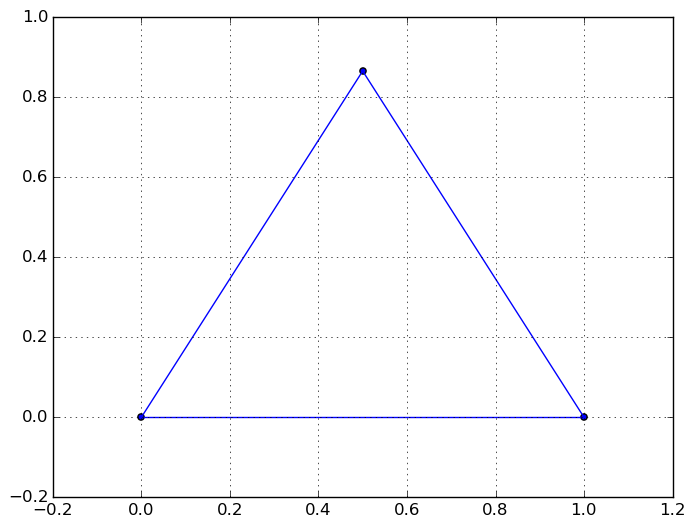

In [77]:
scatter(Z[1,:][:], Z[2,:][:]);
plot(Z[1,:][:], Z[2,:][:], color="blue");
plot(ZD[1,:][:], ZD[2,:][:], color="blue");
grid(true)
savefig("blog/_assets/vertices_level_$(m).png", dpi=300);

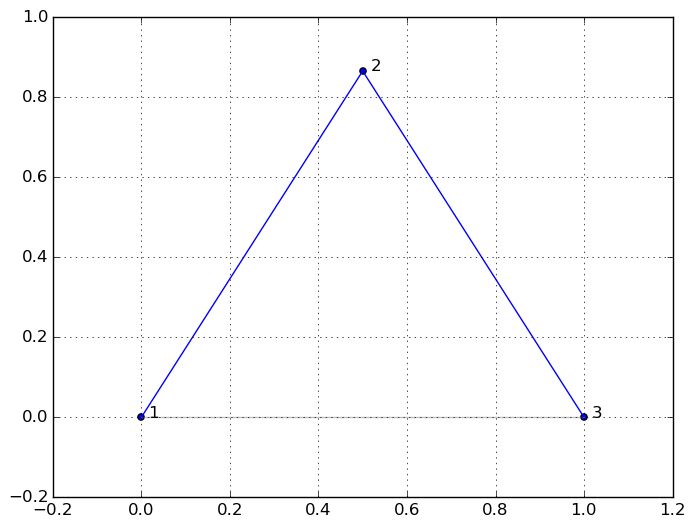

In [80]:
scatter(Z[1,:][:], Z[2,:][:]);
plot(Z[1,:][:], Z[2,:][:], color="blue");
plot(ZD[1,:][:], ZD[2,:][:], color="grey", alpha=0.5);
for i=1:total_length
    annotate(@sprintf("%d", i), (Z[1,i]+0.02,Z[2,i]));
end
grid(true)
savefig("blog/_assets/spiked_$(m).png", dpi=300);

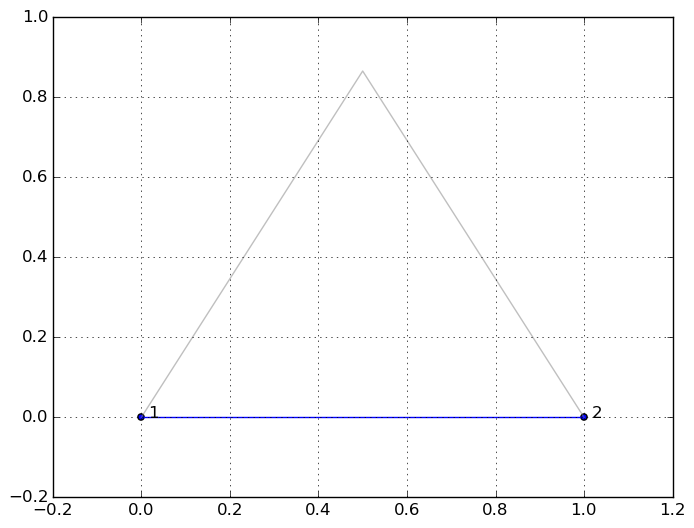

In [79]:
scatter(ZD[1,:][:], ZD[2,:][:]);
plot(ZD[1,:][:], ZD[2,:][:], color="blue");
plot(Z[1,:][:], Z[2,:][:], color="grey", alpha=0.5);
for i=1:(total_length-1)
    annotate(@sprintf("%d", i), (ZD[1,i]+0.02,ZD[2,i]));
end
grid(true)
axis([-0.2,1.2,-0.2,1.0])
savefig("blog/_assets/flat_$(m).png", dpi=300);

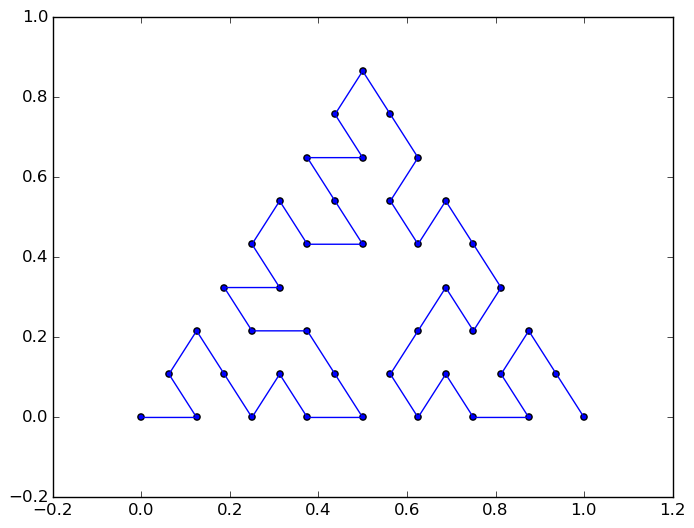

In [794]:
plot(Z[1,:][:], Z[2,:][:]);
scatter(Z[1,:][:], Z[2,:][:]);

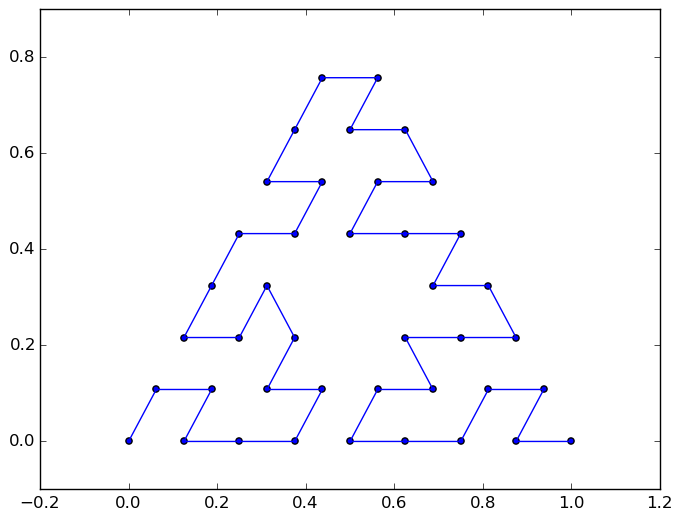

In [795]:
plot(ZD[1,:][:], ZD[2,:][:]);
scatter(ZD[1,:][:], ZD[2,:][:]);

In [796]:
size(measure_denominator)

(42,)

In [797]:
size(Z[1,:][:])

(42,)

In [798]:
measure_denominator

42-element Array{Float64,1}:
 0.0665761
 0.0554497
 0.0499776
 0.0321024
 0.0171456
 0.0470593
 0.014592 
 0.0419521
 0.0894977
 0.031008 
 0.0171456
 0.0120384
 0.0229824
 ⋮        
 0.029792 
 0.038912 
 0.0100928
 0.0254144
 0.0582465
 0.0272384
 0.0998337
 0.15273  
 0.0451137
 0.114791 
 0.158202 
 0.318685 

In [799]:
sum(measure_denominator)

2.58160304616024

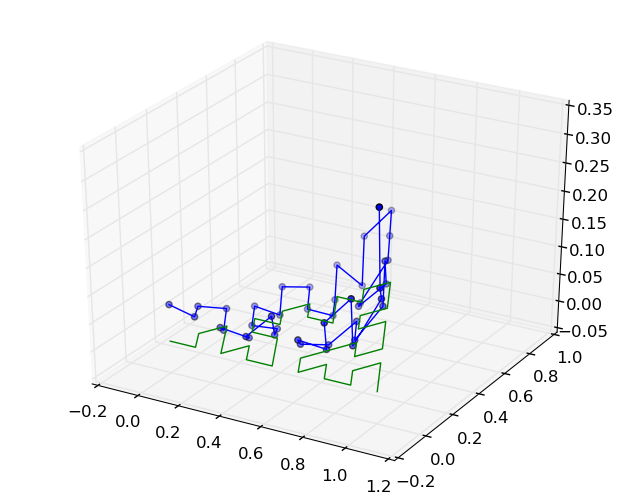

In [800]:
plot3D(Z[1,:][:], Z[2,:][:], zs=measure_denominator);
plot3D(Z[1,:][:], Z[2,:][:], zs=zeros(total_length));
scatter3D(Z[1,:][:], Z[2,:][:], zs=measure_denominator);

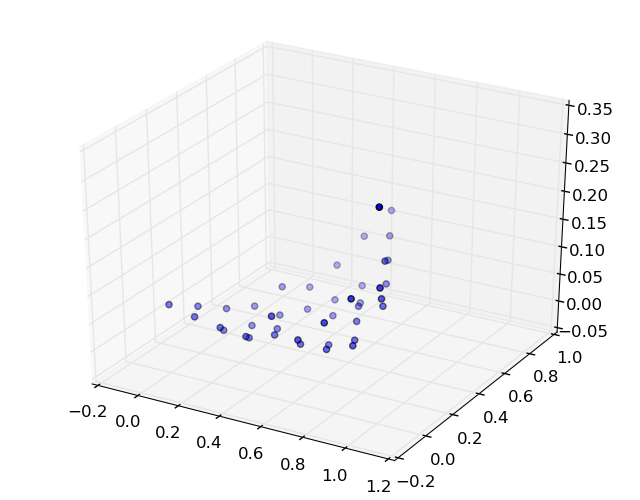

In [801]:
scatter3D(Z[1,:][:], Z[2,:][:], zs=measure_denominator);